# Import libraries

In [1]:
import pandas as pd
import numpy as np

# Import and load dataset

In [2]:
Medical_insurance_data = pd.read_csv('Medical_insurance_dataset.csv')

In [3]:
Medical_insurance_data.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased


In [4]:
Medical_insurance_data.shape

(400, 5)

In [5]:
Medical_insurance_data['EstimatedSalary'].median()

70000.0

In [6]:
Medical_insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    object
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
labels = label_encode.fit_transform(Medical_insurance_data['Purchased'])
Medical_insurance_data['Target'] = labels
Medical_insurance_data.drop(columns = ['User ID', 'Purchased'], axis=1, inplace=True)

In [8]:
Medical_insurance_data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Target             0
dtype: int64

In [9]:
Medical_insurance_data.describe()

,Age,EstimatedSalary,Target
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [10]:
Medical_insurance_data['Target'].value_counts()

0    257
1    143
Name: Target, dtype: int64

In [11]:
Medical_insurance_data.groupby('Target').mean()

,Age,EstimatedSalary
Target,,
0,32.793774,60544.747082
1,46.391608,86272.727273


# Exploratory Data Analysis/ Data Visualisation

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Target', ylabel='count'>

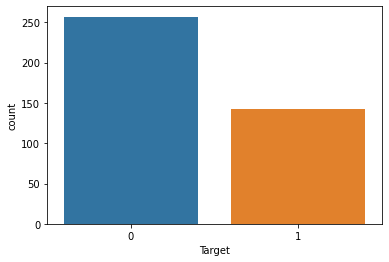

In [13]:
sns.countplot(x='Target', data=Medical_insurance_data)

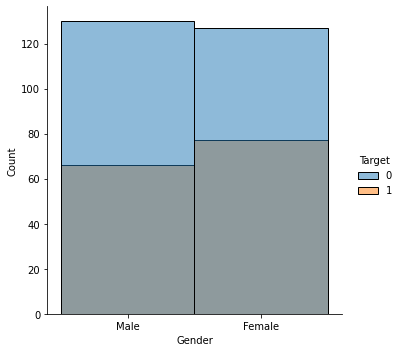

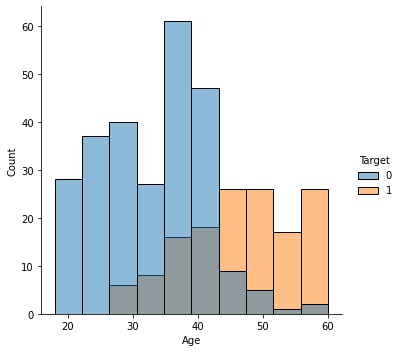

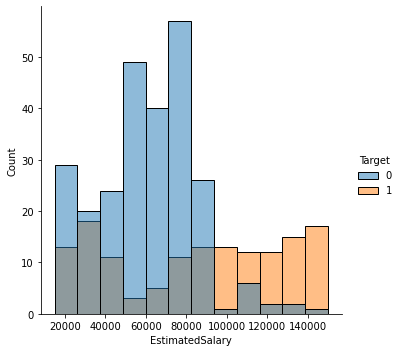

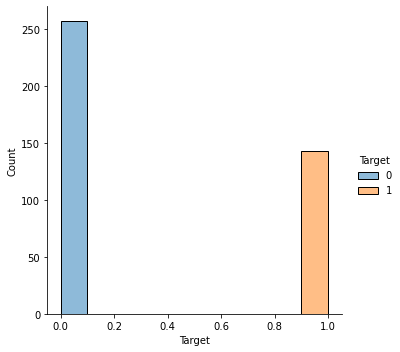

In [14]:
for column in Medical_insurance_data:
    sns.displot(x=column, data=Medical_insurance_data,hue='Target')

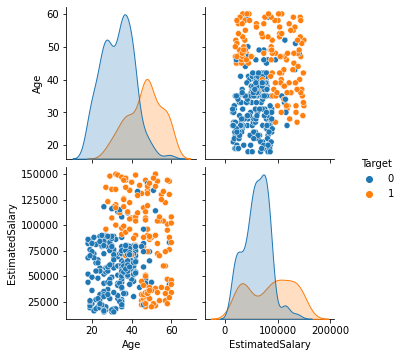

In [15]:
sns.pairplot(Medical_insurance_data, hue = 'Target')

<AxesSubplot:xlabel='Target', ylabel='EstimatedSalary'>

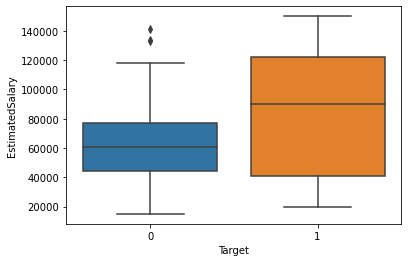

In [16]:
sns.boxplot(x='Target', y='EstimatedSalary', data=Medical_insurance_data)

<AxesSubplot:xlabel='Target', ylabel='Age'>

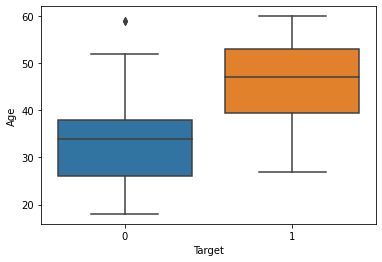

In [17]:
sns.boxplot(x='Target', y='Age', data=Medical_insurance_data)

<AxesSubplot:>

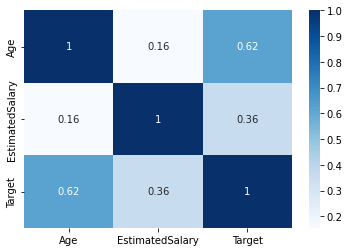

In [18]:
Medical_insurance_data_mx = Medical_insurance_data.corr()
sns.heatmap(Medical_insurance_data_mx, annot = True, cmap='Blues')

# Inference from the data

1. The dataset has 400 rows and 5 columns
2. There is no missing values in the dataset
3. All variables have continuous numerical values except for Target and Gender columns
4. Mean is similar to the median for most of the features
5. There's quite an imbalance in the dataset (Not Purchased (0) are more than Purchased (1)). Refer count plot.
6. The features have outliers
7. Age has the highest correlation.

# Insights from the data

1. Most people that visit the medical insurance company did not want to buy the insurance. This is an example of class imbalanced. That is, there is no equal of proportion of those that will buy or not.

2. Older people purchase the insurance more than young people

3. People that earn higher purchase insurance more than low income earners.

# Data Preprocessing

In [20]:
Features_df = Medical_insurance_data.drop(['Target'], axis=1)
Target_df = Medical_insurance_data['Target']

In [21]:
Features_df = pd.get_dummies(Features_df)
Features_df

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


# Model Selection 

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(Features_df, Target_df, test_size = 0.2, random_state = 42)

# Insurance Purchase Predictions using machine learning

Models to be used:

1. Logistic Regression Model: I just want to try this out despite the fact that the data is imbalanced
2. Naive Bayes Model
3. Random forest model
4. Extreme Gradient Boost (XGBoost) model
5. Support Vector Machine model
6. K Nearest Neighbor
7. Decision Tree Classifier
8. Gradient Boost Classifier

# Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

y_pred = log_reg.predict(x_test)

In [24]:
# Visualization of Confusion matrix using a function
def ConfusionMatrix(y_test, y_pred, label = ["Negative", "Positive"]):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'Blues')
    plt.xlabel('Predicted', fontsize = 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.ylabel('Truth', fontsize = 13)
    plt.title('A confusion matrix');

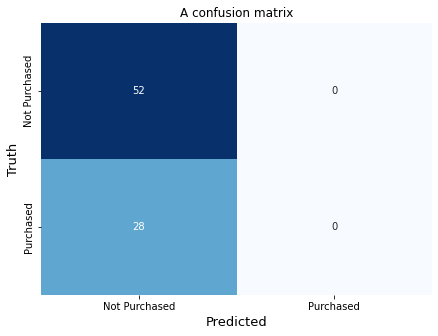

In [25]:
ConfusionMatrix(y_test, y_pred, label=['Not Purchased', 'Purchased'])

# Prediction from logistic regression model:

52 True negative (TN): The model predicted that 52 people did not purchase and that number did not purchase.

28 False negative (FN): The model predicts that 28 people did not purchase whereas they did.

# Naive Bayes Model

In [26]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(x_train, y_train)
naive_model_pred = naive_model.predict(x_test)


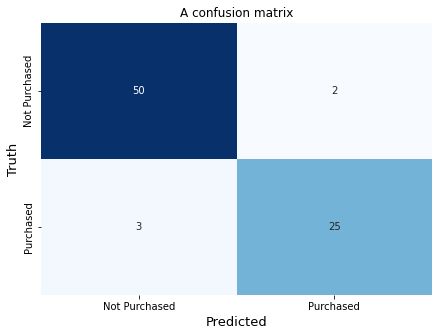

In [27]:
ConfusionMatrix(y_test, naive_model_pred, label=['Not Purchased', 'Purchased'])

# Prediction using Naive Bayes Model

50 True Negative (TN): This model predicted that 50 customers will not purchase the insurance and truly they did not.

25 True Positive (FN): This model predicted that 25 customers will purchase the insurance and they did.

2 False Positive (FP): 2 customers were predicted to buy the insurance whereas they didn't.

3 False Negative (FN): 3 customers were predicted not to buy the insurance whereas they did. 

# Random Forest Model

In [28]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)

random_forest_pred = random_forest_model.predict(x_test)

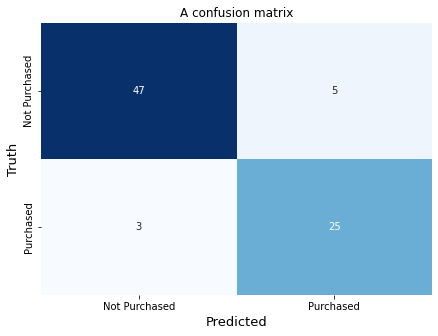

In [29]:
ConfusionMatrix(y_test, random_forest_pred, label=['Not Purchased', 'Purchased'])

# Extreme Gradient Boost (XGBoost) Model

In [32]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(use_label_encode = False)
xgboost_model.fit(x_train, y_train)

xgboost_model_pred = xgboost_model.predict(x_test)

C:\Users\OMNL\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "use_label_encode" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


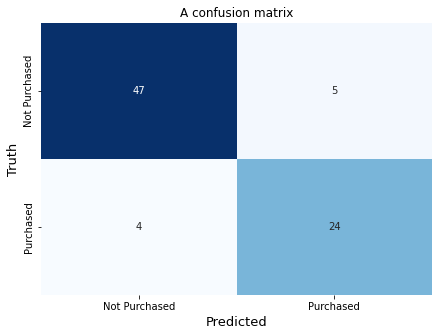

In [31]:
ConfusionMatrix(y_test, xgboost_model_pred, label=['Not Purchased', 'Purchased'])

# Support Vector Machine Model

In [33]:
from sklearn.svm import SVC
SVM_model = SVC()
SVM_model.fit(x_train, y_train)

SVM_model_pred = SVM_model.predict(x_test)

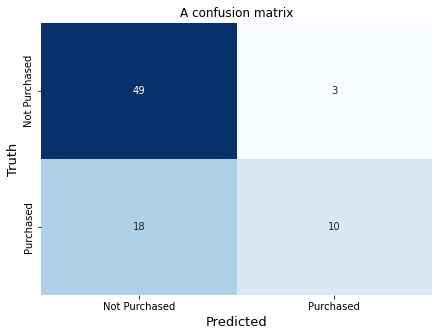

In [34]:
ConfusionMatrix(y_test, SVM_model_pred, label=['Not Purchased', 'Purchased'])

# K-Nearest Neighbors

In [35]:
from sklearn.neighbors import KNeighborsClassifier
K_Neighbor = KNeighborsClassifier()
K_Neighbor.fit(x_train, y_train)

K_Neighbor_pred = K_Neighbor.predict(x_test)

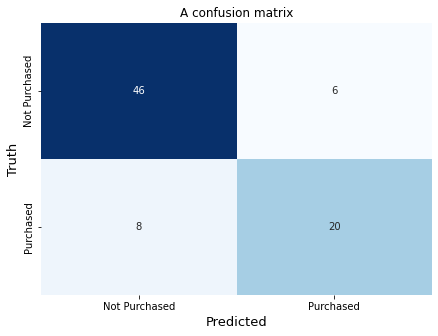

In [36]:
ConfusionMatrix(y_test, K_Neighbor_pred, label=['Not Purchased', 'Purchased'])

# Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
decision_tree_model_pred = decision_tree_model.predict(x_test)

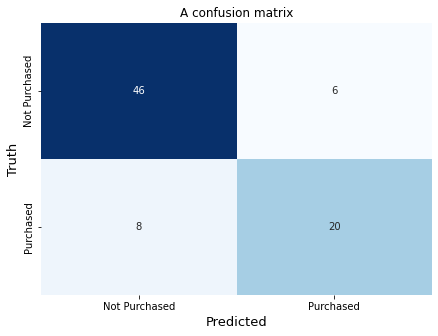

In [38]:
ConfusionMatrix(y_test, decision_tree_model_pred, label = ['Not Purchased', 'Purchased'])

# Gradient Boost Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost = GradientBoostingClassifier()
grad_boost.fit(x_train, y_train)

grad_boost_pred = grad_boost.predict(x_test)

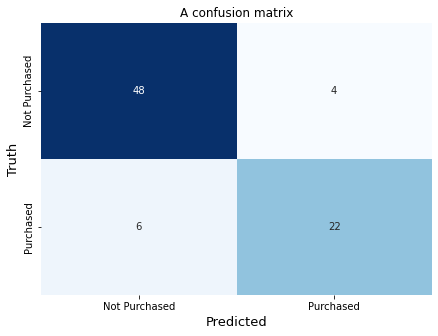

In [40]:
ConfusionMatrix(y_test, grad_boost_pred, label=['Not Purchased', 'Purchased'])

# Estimating Model Accuracy using evaluation metrics

I used the following evaluation metrics to check model that fits the data most
1. f1_score
2. accuracy_score

In [43]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
model_evaluation= pd.DataFrame({'Model':['Logistic_Regression', 'Naive_Bayes', 'Random_Forest', 'XGBoost', 'SVM', 'K_Neighbor', 'Decision_tree', 'Gradient_boost'],
                                'F1_score':[f1_score(y_test, y_pred), f1_score(y_test, naive_model_pred), f1_score(y_test, random_forest_pred), f1_score(y_test, xgboost_model_pred), f1_score(y_test, SVM_model_pred), f1_score(y_test, K_Neighbor_pred), f1_score(y_test, decision_tree_model_pred), f1_score(y_test, grad_boost_pred)],
                               'Accuracy_score':[accuracy_score(y_test, y_pred), accuracy_score(y_test, naive_model_pred), accuracy_score(y_test, random_forest_pred), accuracy_score(y_test, xgboost_model_pred), accuracy_score(y_test, SVM_model_pred), accuracy_score(y_test, K_Neighbor_pred), accuracy_score(y_test, decision_tree_model_pred), accuracy_score(y_test, grad_boost_pred)]})
model_evaluation

,Model,F1_score,Accuracy_score
0,Logistic_Regression,0.000000,0.6500
1,Naive_Bayes,0.909091,0.9375
2,Random_Forest,0.862069,0.9000
3,XGBoost,0.842105,0.8875
4,SVM,0.487805,0.7375
5,K_Neighbor,0.740741,0.8250
6,Decision_tree,0.740741,0.8250
7,Gradient_boost,0.814815,0.8750


# Based on the evaluation metrics, the best prediction model for the Medical_insurance_dataset.csv is the Naive Bayes model.